# Data aggregation

Fitbit exports data as a ton of `.json` and `.csv` files, that are not necessarily optimised for analysis. In this notebook, I will collect and aggregate the data into a table that collects data per day. 

## Exploration & file structure

In [1]:
import os
workdir = os.getcwd()
print(workdir)
print(os.listdir(workdir))

/home/leon/Fitbit_data
['Data_agg.ipynb', '.ipynb_checkpoints', 'MyFitbitData.zip', 'MyFitbitData']


In [2]:
os.chdir('MyFitbitData/LeonSchoonderwoerd')
workdir = os.getcwd()
print(workdir)
print(os.listdir(workdir))

/home/leon/Fitbit_data/MyFitbitData/LeonSchoonderwoerd
['Application', 'Menstrual Health', 'Sleep', 'Personal & Account', 'Other', 'Nutrition', 'Stress', 'Social', 'Physical Activity']


In [3]:
os.chdir('Sleep')
workdir = os.getcwd()
print(workdir)
print(os.listdir(workdir))

/home/leon/Fitbit_data/MyFitbitData/LeonSchoonderwoerd/Sleep
['Device Temperature - 2020-06-10.csv', 'Device Temperature - 2020-06-13.csv', 'Device Temperature - 2020-06-07.csv', 'Device Temperature - 2020-07-23.csv', 'Device Temperature - 2020-09-01.csv', 'Device Temperature - 2020-08-28.csv', 'Device Temperature - 2020-09-28.csv', 'Device Temperature - 2020-06-05.csv', 'Device Temperature - 2020-10-05.csv', 'Device Temperature - 2020-06-14.csv', 'Device Temperature - 2020-08-23.csv', 'Device Temperature - 2020-08-20.csv', 'Device Temperature - 2020-08-07.csv', 'Device Temperature - 2020-06-15.csv', 'Device Temperature - 2020-07-28.csv', 'Device Temperature - 2020-08-09.csv', 'Device Temperature - 2020-07-16.csv', 'Device Temperature - 2020-09-21.csv', 'Heart Rate Variability README.txt', 'Device Temperature - 2020-06-02.csv', 'Device Temperature - 2020-07-10.csv', 'Device Temperature - 2020-06-12.csv', 'Device Temperature - 2020-06-23.csv', 'Device Temperature - 2020-09-27.csv', 'Dev

As we see, there is a whole list of separate files here. Similar results are found in the other folders.

## Aggregating sleep data

Let's first define a few directories, so we don't have to keep using `os.chdir()`.

In [5]:
os.chdir('../../..')
print(os.getcwd())

/home/leon/Fitbit_data


In [8]:
main_dir = os.getcwd()
username = 'LeonSchoonderwoerd'
data_dir = os.path.join(main_dir, 'MyFitbitData', username)
data_dirs = os.listdir(data_dir)
print(data_dirs)

['Application', 'Menstrual Health', 'Sleep', 'Personal & Account', 'Other', 'Nutrition', 'Stress', 'Social', 'Physical Activity']


### Basic exploration

Now, let's look at the `Sleep` data. We'll ignore the `Device Temperature` files and focus on the `Sleep` files:

In [11]:
for filename in os.listdir(os.path.join(data_dir, 'Sleep')):
    if 'sleep' in filename:
        print(filename)

sleep-2020-05-08.json
sleep-2020-10-05.json
sleep-2020-09-05.json
sleep_score.csv
sleep-2020-07-07.json
sleep-2020-06-07.json
sleep-2020-04-08.json
sleep-2020-08-06.json


Alright! We have a single `.csv` with sleep scores, as well as a `.json` for each month, containing details of sleep that night. Let's first load the sleep scores, and take a look.

In [31]:
import pandas as pd
sleep_scores = pd.read_csv(os.path.join(data_dir, 'Sleep', 'sleep_score.csv'))
sleep_scores.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,29272484200,2020-10-14T08:37:30Z,79,21,21,37,74,45,0.089061
1,29258226487,2020-10-13T08:34:30Z,83,18,21,44,66,45,0.104386
2,29239981449,2020-10-12T08:36:00Z,78,22,20,36,87,45,0.089728
3,29227910597,2020-10-11T09:26:00Z,80,19,22,39,75,45,0.066084
4,29215246798,2020-10-10T09:23:00Z,88,20,22,46,93,45,0.056881


In [32]:
sleep_scores.describe()

,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2.799698e+10,81.294118,20.358289,20.930481,40.005348,88.165775,46.641711,0.079579
std,7.531101e+08,5.116295,1.935790,1.926187,3.378454,19.986267,1.676842,0.020694
min,2.668045e+10,52.000000,13.000000,12.000000,24.000000,23.000000,44.000000,0.042386
25%,2.737396e+10,79.000000,19.000000,20.000000,38.500000,76.000000,45.000000,0.065348
50%,2.800923e+10,82.000000,21.000000,21.000000,41.000000,89.000000,46.000000,0.076162
75%,2.864144e+10,85.000000,22.000000,22.000000,42.000000,101.500000,48.000000,0.089287
max,2.927248e+10,92.000000,24.000000,24.000000,46.000000,151.000000,53.000000,0.198643


In [33]:
sleep_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sleep_log_entry_id     187 non-null    int64  
 1   timestamp              187 non-null    object 
 2   overall_score          187 non-null    int64  
 3   composition_score      187 non-null    int64  
 4   revitalization_score   187 non-null    int64  
 5   duration_score         187 non-null    int64  
 6   deep_sleep_in_minutes  187 non-null    int64  
 7   resting_heart_rate     187 non-null    int64  
 8   restlessness           187 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 13.3+ KB


Nice! We get timestamps (which seem to be defined by the time of waking), overall sleep scores, and sub-scores for different components. We can easily tell that `overall_score` is the sum of `composition_score`, `revitalization_score` and `duration_score` (whatever those may mean). We also have the amount of deep sleep, resting heart rate and a `restlessness` score, that seem to be less directly correlated to the overall score. 

What we'll do with this data:
- Some quick visualisations to get a better feel.
- Extract a `date` column from the timestamps, for later use.

### Visualizing sleep scores

Some histograms for the different scores:

<ipython-input-25-3769b47ef4cd>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  sleep_scores.hist(scores_of_interest, ax=plt.gca())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd353361f0>,
      dtype=object)

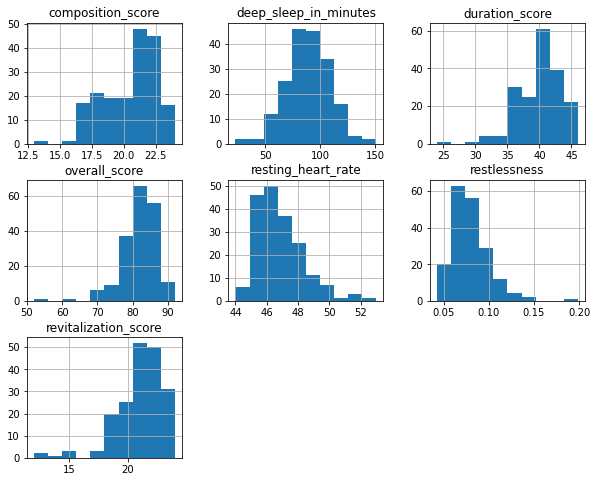

In [25]:
import matplotlib.pyplot as plt
scores_of_interest = ['overall_score', 'composition_score', 'revitalization_score', 'duration_score', 
                      'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness']
plt.figure(figsize=(10, 8))
sleep_scores.hist(scores_of_interest, ax=plt.gca())

And some scatter plots, looking only at the total score, deep sleep, heart rate and restlessness (since the sub-scores correlate *too* explicitly anyway)

<ipython-input-28-26e628a2a3ff>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(sleep_scores[['overall_score', 'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness']], ax=plt.gca())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3407db50>,
      dtype=object)

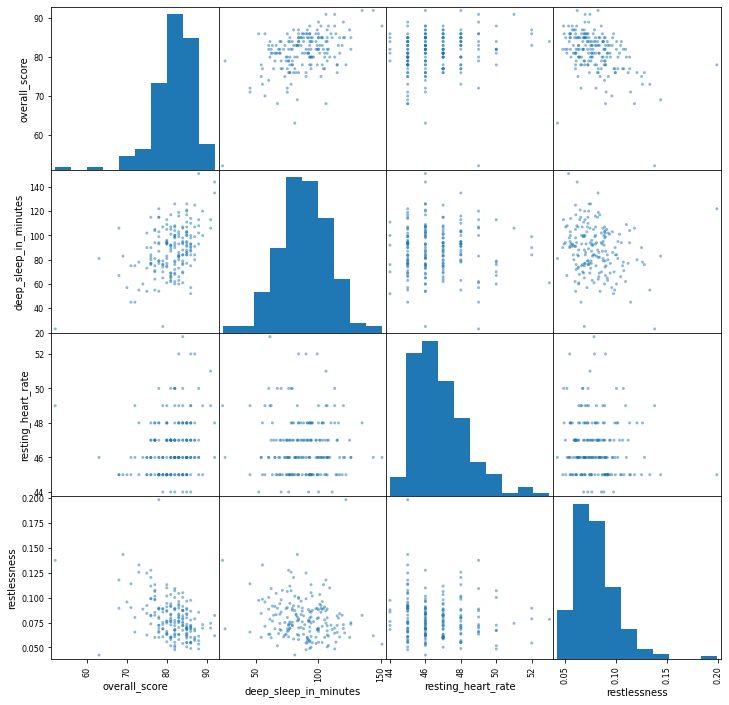

In [28]:
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(sleep_scores[['overall_score', 'deep_sleep_in_minutes', 'resting_heart_rate', 'restlessness']], ax=plt.gca())

Takeaways:
- There seems to be a slight positive correlation between deep sleep and overall score, and a slight negative correlation between restlessness and overall score. Not surprising. 
- Those two features seem fairly uncorrelated between them, which is useful for later analysis
- Because the resting heart rate is quantized to 1 bpm, the data there is stratified. No clear patterns visible by eye.

### Extract dates

In [36]:
sleep_scores['date'] = pd.to_datetime(sleep_scores['timestamp']).dt.date
print(sleep_scores.head())

   sleep_log_entry_id             timestamp  overall_score  composition_score  \
0         29272484200  2020-10-14T08:37:30Z             79                 21   
1         29258226487  2020-10-13T08:34:30Z             83                 18   
2         29239981449  2020-10-12T08:36:00Z             78                 22   
3         29227910597  2020-10-11T09:26:00Z             80                 19   
4         29215246798  2020-10-10T09:23:00Z             88                 20   

   revitalization_score  duration_score  deep_sleep_in_minutes  \
0                    21              37                     74   
1                    21              44                     66   
2                    20              36                     87   
3                    22              39                     75   
4                    22              46                     93   

   resting_heart_rate  restlessness        date  
0                  45      0.089061  2020-10-14  
1               

## Getting predictor data

Now it's time to get more data out of the many, many `.json` files we have. We *could* look at the `sleep_yyyy_mm_dd.json` files, which contain details of the sleep for each night (including for example the number of minutes spent in each sleep stage). However, it's probably more fun to see if and how physical activity affects sleep.

Let's see what data we have:

In [41]:
for filename in sorted(os.listdir(os.path.join(data_dir, 'Physical Activity'))):  # Sort for easier reading
    if not 'heart_rate' in filename:  # Because that's too many files
        print(filename)

altitude-2020-04-08.json
altitude-2020-05-08.json
altitude-2020-06-07.json
altitude-2020-07-07.json
altitude-2020-08-06.json
altitude-2020-09-05.json
altitude-2020-10-05.json
calories-2020-04-08.json
calories-2020-05-08.json
calories-2020-06-07.json
calories-2020-07-07.json
calories-2020-08-06.json
calories-2020-09-05.json
calories-2020-10-05.json
demographic_vo2_max-2020-04-08.json
distance-2020-04-08.json
distance-2020-05-08.json
distance-2020-06-07.json
distance-2020-07-07.json
distance-2020-08-06.json
distance-2020-09-05.json
distance-2020-10-05.json
exercise-0.json
exercise-100.json
exercise-200.json
exercise-300.json
lightly_active_minutes-2020-04-08.json
lightly_active_minutes-2020-05-08.json
lightly_active_minutes-2020-06-07.json
lightly_active_minutes-2020-07-07.json
lightly_active_minutes-2020-08-06.json
lightly_active_minutes-2020-09-05.json
lightly_active_minutes-2020-10-05.json
moderately_active_minutes-2020-04-08.json
moderately_active_minutes-2020-05-08.json
moderately_a

A wealth of data! So much, in fact, that it's going to be tedious to go through all of it. Let's do some pre-selecting:
- Ignore swimming data (because I don't swim).
- Ignore altitude data (little variation therein anyway)
- Do not take both distance *and* steps; these are too closely related.
- The different types of active minutes (sedentary, lightly, moderately, very active) can be useful. But because they are split over 4 sets of data, we will shelve them for now.

So, for now I will focus on:
- Distance
- Calories

### Loading and combining `.json` data for calories

Let's take a look at the `calories` data. We will need to combine several sets, but will first need to see what one of these looks like.

In [52]:
cals1 = pd.read_json(os.path.join(data_dir, 'Physical Activity', 'calories-2020-04-08.json'))

In [53]:
cals1.head()

,dateTime,value
0,2020-04-08 00:00:00,1.26
1,2020-04-08 00:01:00,1.26
2,2020-04-08 00:02:00,1.26
3,2020-04-08 00:03:00,1.26
4,2020-04-08 00:04:00,1.26


Alright, that's not very helpful: we get the amount of calories *per minute*, but we want it *per day*. So, we need to do some simple aggregating.

First, get the dates:

In [54]:
cals1['date'] = cals1['dateTime'].dt.date

In [55]:
cals1.head()

,dateTime,value,date
0,2020-04-08 00:00:00,1.26,2020-04-08
1,2020-04-08 00:01:00,1.26,2020-04-08
2,2020-04-08 00:02:00,1.26,2020-04-08
3,2020-04-08 00:03:00,1.26,2020-04-08
4,2020-04-08 00:04:00,1.26,2020-04-08


Then, collect the total calories per day:

In [68]:
cals2 = cals1.groupby('date', as_index=False).agg({'value': 'sum'})

In [69]:
print(cals2.head(), type(cals2))

         date    value
0  2020-04-08  1814.40
1  2020-04-09  2583.14
2  2020-04-10  3635.23
3  2020-04-11  3183.30
4  2020-04-12  3364.11 <class 'pandas.core.frame.DataFrame'>


That looks useful! Now we need to collect data from all the files we have, and join them together into a single dataframe.

In [120]:
frames = []
for filename in os.listdir(os.path.join(data_dir, 'Physical Activity')):
    if not 'calories' in filename:
        continue
    cals = pd.read_json(os.path.join(data_dir, 'Physical Activity', filename))
    cals['date'] = cals['dateTime'].dt.date
    summed = cals.groupby('date', as_index=False).agg({'value': 'sum'})
    frames.append(summed)

calories = pd.concat(frames)

In [71]:
print(calories.head())

         date    value
0  2020-07-07  2653.44
1  2020-07-08  2841.67
2  2020-07-09  3267.03
3  2020-07-10  4198.19
4  2020-07-11  3272.13


In [72]:
print(calories.describe())

             value
count   190.000000
mean   3205.738421
std     573.753744
min     773.320000
25%    2813.255000
50%    3206.650000
75%    3557.925000
max    5038.520000


In [73]:
print(calories.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   value   190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd31db2790>]],
      dtype=object)

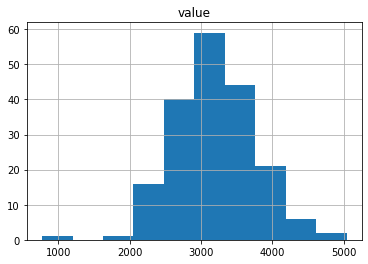

In [74]:
calories.hist()

Wonderful. One thing to note is that there seem to be 3 more entries in `calories` than there are in `sleep_scores`. Hopefully that will be resolved by matching data on dates. For now, we need to collect similar information for distance

###  `.json` data for distance

In [75]:
dist1 = pd.read_json(os.path.join(data_dir, 'Physical Activity', 'distance-2020-04-08.json'))

In [76]:
print(dist1.head())

             dateTime  value
0 2020-04-09 10:36:00      0
1 2020-04-09 10:37:00      0
2 2020-04-09 10:38:00      0
3 2020-04-09 10:43:00      0
4 2020-04-09 10:44:00      0


Looks like the same thing: distance collected by some time interval smaller than a day. Follow the same procedure as for calories:

In [121]:
frames = []
for filename in os.listdir(os.path.join(data_dir, 'Physical Activity')):
    if not 'distance' in filename:
        continue
    dist = pd.read_json(os.path.join(data_dir, 'Physical Activity', filename))
    dist['date'] = dist['dateTime'].dt.date
    summed = dist.groupby('date', as_index=False).agg({'value': 'sum'})
    frames.append(summed)

distance = pd.concat(frames)

In [86]:
print(distance.head())

         date    value
0  2020-04-09   396100
1  2020-04-10  1479970
2  2020-04-11   667330
3  2020-04-12  1373720
4  2020-04-13   615080


In [87]:
print(distance.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    195 non-null    object
 1   value   195 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB
None


In [88]:
print(distance.describe())

              value
count  1.950000e+02
mean   8.907349e+05
std    4.925827e+05
min    0.000000e+00
25%    6.020100e+05
50%    8.520900e+05
75%    1.246845e+06
max    2.651220e+06


So there are 195 values here, compared to 190/187 before. Again, this should be sorted out once we join on date.

Also, the units of `distance` are centimeters, by the looks of it.

## Putting it all together

Now that we have our sleep data, as well as info on calories and distance, we want to join the three dataframes together. If this were SQL, an INNER JOIN on `date` would be the solution. In pandas we can do something similar.

First ensure that all three dataframes have the same index, and that calories and distance can be distinguished.

In [129]:
sleep_scores.set_index('date', inplace=True)
calories.set_index('date', inplace=True)
distance.set_index('date', inplace=True)
calories.rename(columns={"value": "calories"}, inplace=True)
distance.rename(columns={"value": "distance"}, inplace=True)

In [130]:
print(sleep_scores.head())
print(calories.head())
print(distance.head())

            sleep_log_entry_id             timestamp  overall_score  \
date                                                                  
2020-10-14         29272484200  2020-10-14T08:37:30Z             79   
2020-10-13         29258226487  2020-10-13T08:34:30Z             83   
2020-10-12         29239981449  2020-10-12T08:36:00Z             78   
2020-10-11         29227910597  2020-10-11T09:26:00Z             80   
2020-10-10         29215246798  2020-10-10T09:23:00Z             88   

            composition_score  revitalization_score  duration_score  \
date                                                                  
2020-10-14                 21                    21              37   
2020-10-13                 18                    21              44   
2020-10-12                 22                    20              36   
2020-10-11                 19                    22              39   
2020-10-10                 20                    22              46   

    

In [131]:
print(sleep_scores.index.is_unique)
print(calories.index.is_unique)
print(distance.index.is_unique)

True
True
False


At some point, `distance` contained duplicates. I *could* investigate how that can be the case (maybe due to duplicate dates across `.json`s), *or* just remove the duplicates:

In [132]:
distance = distance[~distance.index.duplicated(keep='first')]

In [133]:
df = pd.concat([sleep_scores, calories, distance], join='inner', axis=1)

In [134]:
print(df.head())

            sleep_log_entry_id             timestamp  overall_score  \
date                                                                  
2020-10-14         29272484200  2020-10-14T08:37:30Z             79   
2020-10-13         29258226487  2020-10-13T08:34:30Z             83   
2020-10-12         29239981449  2020-10-12T08:36:00Z             78   
2020-10-11         29227910597  2020-10-11T09:26:00Z             80   
2020-10-10         29215246798  2020-10-10T09:23:00Z             88   

            composition_score  revitalization_score  duration_score  \
date                                                                  
2020-10-14                 21                    21              37   
2020-10-13                 18                    21              44   
2020-10-12                 22                    20              36   
2020-10-11                 19                    22              39   
2020-10-10                 20                    22              46   

    

In [135]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 2020-10-14 to 2020-04-10
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sleep_log_entry_id     187 non-null    int64  
 1   timestamp              187 non-null    object 
 2   overall_score          187 non-null    int64  
 3   composition_score      187 non-null    int64  
 4   revitalization_score   187 non-null    int64  
 5   duration_score         187 non-null    int64  
 6   deep_sleep_in_minutes  187 non-null    int64  
 7   resting_heart_rate     187 non-null    int64  
 8   restlessness           187 non-null    float64
 9   calories               187 non-null    float64
 10  distance               187 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 17.5+ KB
None


In [136]:
print(df.describe())

       sleep_log_entry_id  overall_score  composition_score  \
count        1.870000e+02     187.000000         187.000000   
mean         2.799698e+10      81.294118          20.358289   
std          7.531101e+08       5.116295           1.935790   
min          2.668045e+10      52.000000          13.000000   
25%          2.737396e+10      79.000000          19.000000   
50%          2.800923e+10      82.000000          21.000000   
75%          2.864144e+10      85.000000          22.000000   
max          2.927248e+10      92.000000          24.000000   

       revitalization_score  duration_score  deep_sleep_in_minutes  \
count            187.000000      187.000000             187.000000   
mean              20.930481       40.005348              88.165775   
std                1.926187        3.378454              19.986267   
min               12.000000       24.000000              23.000000   
25%               20.000000       38.500000              76.000000   
50%         

## Save the data

In [137]:
df.to_csv('Fitbit_data_agg.csv')